In [ ]:
from azureml.opendatasets import NycTlcYellow
from dateutil import parser

end_date = parser.parse('2019-06-06')
start_date = parser.parse('2018-05-01')
nyc_tlc = NycTlcYellow(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

In [3]:
nyc_tlc_df.head()

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,rateCodeId,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2018-10-14 17:42:59,2018-10-14 17:53:44,1,2.37,43,163,NaN,NaN,NaN,...,1,N,2,10.5,0.0,0.5,0.3,0.00,0.0,11.30
1,2,2018-09-30 01:04:49,2018-10-01 00:41:12,1,21.85,132,13,NaN,NaN,NaN,...,2,N,1,52.0,0.0,0.5,0.3,10.56,0.0,63.36
2,1,2018-10-03 16:14:19,2018-10-03 16:28:25,1,1.70,162,186,NaN,NaN,NaN,...,1,N,1,10.5,1.0,0.5,0.3,2.45,0.0,14.75
3,2,2018-09-30 01:18:00,2018-10-01 01:13:50,5,2.08,186,231,NaN,NaN,NaN,...,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,9.80
4,1,2018-10-03 18:09:22,2018-10-03 18:23:39,1,1.40,142,162,NaN,NaN,NaN,...,1,N,1,10.0,1.0,0.5,0.3,2.35,0.0,14.15


In [4]:
display(nyc_tlc_df.head(5))

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,rateCodeId,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2018-10-14 17:42:59,2018-10-14 17:53:44,1,2.37,43,163,NaN,NaN,NaN,...,1,N,2,10.5,0.0,0.5,0.3,0.00,0.0,11.30
1,2,2018-09-30 01:04:49,2018-10-01 00:41:12,1,21.85,132,13,NaN,NaN,NaN,...,2,N,1,52.0,0.0,0.5,0.3,10.56,0.0,63.36
2,1,2018-10-03 16:14:19,2018-10-03 16:28:25,1,1.70,162,186,NaN,NaN,NaN,...,1,N,1,10.5,1.0,0.5,0.3,2.45,0.0,14.75
3,2,2018-09-30 01:18:00,2018-10-01 01:13:50,5,2.08,186,231,NaN,NaN,NaN,...,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,9.80
4,1,2018-10-03 18:09:22,2018-10-03 18:23:39,1,1.40,142,162,NaN,NaN,NaN,...,1,N,1,10.0,1.0,0.5,0.3,2.35,0.0,14.15


In [11]:
nyc_tlc_df.columns

Index(['vendorID', 'tpepPickupDateTime', 'tpepDropoffDateTime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'startLon', 'startLat', 'endLon', 'endLat', 'rateCodeId',
       'storeAndFwdFlag', 'paymentType', 'fareAmount', 'extra', 'mtaTax',
       'improvementSurcharge', 'tipAmount', 'tollsAmount', 'totalAmount'],
      dtype='object')

In [5]:
import azureml.dataprep as dprep

In [6]:
all_columns = dprep.ColumnSelector(term=".*", use_regex=True)
drop_if_all_null = [all_columns, dprep.ColumnRelationship(dprep.ColumnRelationship.ALL)]
useful_columns = [
    "cost", "distance", "dropoff_datetime", "dropoff_latitude", "dropoff_longitude",
    "passengers", "pickup_datetime", "pickup_latitude", "pickup_longitude", "store_forward", "vendor"
]

In [12]:
all_columns

In [7]:
from pandas import *

In [13]:
nyc_tlc_df.groupby(['fareAmount']).mean()

,passengerCount,tripDistance,startLon,startLat,endLon,endLat,rateCodeId,extra,mtaTax,tipAmount,tollsAmount,totalAmount
fareAmount,,,,,,,,,,,,
-800.00,1.0,0.00,NaN,NaN,NaN,NaN,5.0,0.00,0.0,0.00,0.0,-800.30
-498.00,2.5,0.00,NaN,NaN,NaN,NaN,5.0,0.00,-0.5,0.00,0.0,-498.80
-485.00,1.0,0.01,NaN,NaN,NaN,NaN,5.0,0.00,-0.5,0.00,0.0,-485.80
-475.00,1.0,0.00,NaN,NaN,NaN,NaN,5.0,0.00,0.0,0.00,0.0,-475.30
-468.00,1.0,0.00,NaN,NaN,NaN,NaN,5.0,0.00,-0.5,0.00,0.0,-468.80
...,...,...,...,...,...,...,...,...,...,...,...,...
623259.86,1.0,2.40,NaN,NaN,NaN,NaN,1.0,1.00,0.5,0.00,0.0,623261.66
671123.14,1.0,10.60,NaN,NaN,NaN,NaN,1.0,1.00,0.5,0.00,0.0,671124.94
730923.15,1.0,0.50,NaN,NaN,NaN,NaN,1.0,0.01,0.5,0.00,0.0,730923.96


In [14]:
nyc_tlc_df.describe()

,passengerCount,tripDistance,startLon,startLat,endLon,endLat,rateCodeId,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.054953e+08,1.054953e+08,0.0,0.0,0.0,0.0,1.054953e+08,1.054953e+08,1.054953e+08,1.054953e+08,1.054953e+08,1.054953e+08,1.054953e+08
mean,1.584078e+00,2.970261e+00,NaN,NaN,NaN,NaN,1.056898e+00,1.321940e+01,5.833706e-01,4.965710e-01,1.982690e+00,3.620351e-01,1.736183e+01
std,1.232272e+00,4.122042e+00,NaN,NaN,NaN,NaN,8.116952e-01,1.998546e+02,8.914563e-01,5.276943e-02,1.403376e+01,1.791014e+00,2.067377e+02
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,-8.000000e+02,-8.000000e+01,-5.000000e-01,-1.010000e+02,-7.000000e+01,-8.003000e+02
25%,1.000000e+00,9.700000e-01,NaN,NaN,NaN,NaN,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,9.300000e+00
50%,1.000000e+00,1.610000e+00,NaN,NaN,NaN,NaN,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.500000e+00,0.000000e+00,1.288000e+01
75%,2.000000e+00,3.030000e+00,NaN,NaN,NaN,NaN,1.000000e+00,1.450000e+01,1.000000e+00,5.000000e-01,2.640000e+00,0.000000e+00,1.895000e+01
max,9.600000e+01,7.655760e+03,NaN,NaN,NaN,NaN,9.900000e+01,9.432748e+05,5.353800e+02,8.080000e+01,1.414920e+05,3.288000e+03,1.084772e+06


In [15]:
nyc_tlc_df.shape

(105495307, 21)

In [16]:
nyc_tlc_df.memory_usage()

Index                   843962456
vendorID                843962456
tpepPickupDateTime      843962456
tpepDropoffDateTime     843962456
passengerCount          421981228
tripDistance            843962456
puLocationId            843962456
doLocationId            843962456
startLon                843962456
startLat                843962456
endLon                  843962456
endLat                  843962456
rateCodeId              421981228
storeAndFwdFlag         843962456
paymentType             843962456
fareAmount              843962456
extra                   843962456
mtaTax                  843962456
improvementSurcharge    843962456
tipAmount               843962456
tollsAmount             843962456
totalAmount             843962456
dtype: int64

In [17]:
nyc_tlc_df["tpepPickupDateTime"]

0        2018-10-14 17:42:59
1        2018-09-30 01:04:49
2        2018-10-03 16:14:19
3        2018-09-30 01:18:00
4        2018-10-03 18:09:22
                 ...        
202943   2019-06-05 08:38:15
202945   2019-06-05 11:37:58
202947   2019-06-05 07:36:28
202949   2019-06-04 21:59:33
202951   2019-06-05 10:17:56
Name: tpepPickupDateTime, Length: 105495307, dtype: datetime64[ns]

In [7]:
!pip install pyodbc

You should consider upgrading via the '/anaconda/envs/azureml_py36/bin/python -m pip install --upgrade pip' command.


In [18]:
nyc_tlc_df.groupby(['fareAmount']).sum()

,passengerCount,tripDistance,startLon,startLat,endLon,endLat,rateCodeId,extra,mtaTax,tipAmount,tollsAmount,totalAmount
fareAmount,,,,,,,,,,,,
-800.00,1,0.00,0.0,0.0,0.0,0.0,5,0.00,0.0,0.00,0.0,-800.30
-498.00,5,0.00,0.0,0.0,0.0,0.0,10,0.00,-1.0,0.00,0.0,-997.60
-485.00,1,0.01,0.0,0.0,0.0,0.0,5,0.00,-0.5,0.00,0.0,-485.80
-475.00,1,0.00,0.0,0.0,0.0,0.0,5,0.00,0.0,0.00,0.0,-475.30
-468.00,1,0.00,0.0,0.0,0.0,0.0,5,0.00,-0.5,0.00,0.0,-468.80
...,...,...,...,...,...,...,...,...,...,...,...,...
623259.86,1,2.40,0.0,0.0,0.0,0.0,1,1.00,0.5,0.00,0.0,623261.66
671123.14,1,10.60,0.0,0.0,0.0,0.0,1,1.00,0.5,0.00,0.0,671124.94
730923.15,1,0.50,0.0,0.0,0.0,0.0,1,0.01,0.5,0.00,0.0,730923.96


In [20]:
# Create new columns
nyc_tlc_df['day'] = nyc_tlc_df['tpepPickupDateTime'].dt.day
nyc_tlc_df['month'] = nyc_tlc_df['tpepPickupDateTime'].dt.month
nyc_tlc_df['year'] = nyc_tlc_df['tpepPickupDateTime'].dt.year

In [21]:
display(nyc_tlc_df)

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,day,month,year
0,2,2018-10-14 17:42:59,2018-10-14 17:53:44,1,2.37,43,163,NaN,NaN,NaN,...,10.5,0.0,0.5,0.3,0.00,0.0,11.30,14,10,2018
1,2,2018-09-30 01:04:49,2018-10-01 00:41:12,1,21.85,132,13,NaN,NaN,NaN,...,52.0,0.0,0.5,0.3,10.56,0.0,63.36,30,9,2018
2,1,2018-10-03 16:14:19,2018-10-03 16:28:25,1,1.70,162,186,NaN,NaN,NaN,...,10.5,1.0,0.5,0.3,2.45,0.0,14.75,3,10,2018
3,2,2018-09-30 01:18:00,2018-10-01 01:13:50,5,2.08,186,231,NaN,NaN,NaN,...,8.5,0.5,0.5,0.3,0.00,0.0,9.80,30,9,2018
4,1,2018-10-03 18:09:22,2018-10-03 18:23:39,1,1.40,142,162,NaN,NaN,NaN,...,10.0,1.0,0.5,0.3,2.35,0.0,14.15,3,10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202943,2,2019-06-05 08:38:15,2019-06-05 08:43:41,1,0.99,236,238,NaN,NaN,NaN,...,6.0,0.0,0.5,0.3,0.00,0.0,9.30,5,6,2019
202945,2,2019-06-05 11:37:58,2019-06-05 11:55:29,1,2.20,234,232,NaN,NaN,NaN,...,13.0,0.0,0.5,0.3,0.00,0.0,16.30,5,6,2019
202947,1,2019-06-05 07:36:28,2019-06-05 07:44:55,1,1.90,75,41,NaN,NaN,NaN,...,8.0,0.0,0.5,0.3,0.00,0.0,8.80,5,6,2019
202949,2,2019-06-04 21:59:33,2019-06-04 22:05:56,5,1.28,234,170,NaN,NaN,NaN,...,7.0,0.5,0.5,0.3,0.00,0.0,10.80,4,6,2019


In [25]:
grouped_multiple = nyc_tlc_df.groupby(['year', 'month', 'day']).agg({'fareAmount': ['mean', 'min', 'max'], 'totalAmount': ['mean', 'min', 'max']})

In [26]:
grouped_multiple

fareAmount                   totalAmount                  
                     mean    min        max        mean    min        max
year month day                                                           
2018 5     1    13.020619  -70.0     380.00   16.510833  -70.8     456.35
           2    13.174440  -95.0     359.00   16.716820  -95.8     446.78
           3    14.273223  -80.0  234631.88   17.866807  -80.8  234632.68
           4    13.613277 -350.0     800.00   17.181588 -361.3     800.30
           5    12.576683 -485.0     485.00   15.469954 -485.8     498.30
...                   ...    ...        ...         ...    ...        ...
2019 6     2    13.915537 -165.0     500.00   19.801133 -178.8     500.30
           3    14.070464  -85.0     500.00   20.401840  -85.3     500.30
           4    12.989851 -220.0     579.00   19.158073 -222.8     588.92
           5    13.255161 -103.0    1203.00   19.488535 -104.3    1204.80
           6    11.375000    4.5      17.50   16.855000    7.8      25.56

[402 rows x 6 columns]

In [27]:
grouped_multiple = nyc_tlc_df.groupby(['year', 'month', 'day']).agg({'fareAmount': ['sum', 'count', 'max']})

In [30]:
grouped_multiple = nyc_tlc_df.groupby(['year', 'month', 'day']).agg({'fareAmount': ['sum']})

In [33]:
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

     year month day  fareAmount
                            sum
0    2018     5   1  3976939.88
1    2018     5   2  4241365.98
2    2018     5   3  4779131.73
3    2018     5   4  4534936.35
4    2018     5   5  4197442.88
..    ...   ...  ..         ...
397  2019     6   2  2913885.69
398  2019     6   3  3203520.97
399  2019     6   4  2960763.70
400  2019     6   5  3357651.55
401  2019     6   6       45.50

[402 rows x 4 columns]


In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


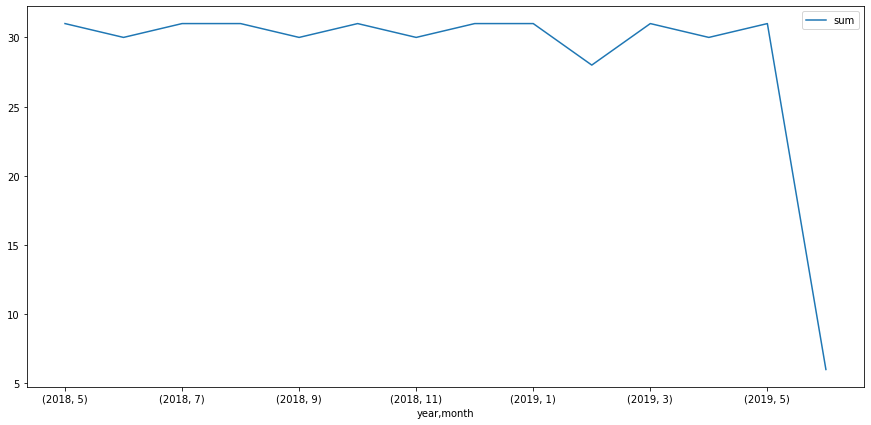

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
grouped_multiple.groupby(['year','month']).count()['fareAmount'].plot(ax=ax)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


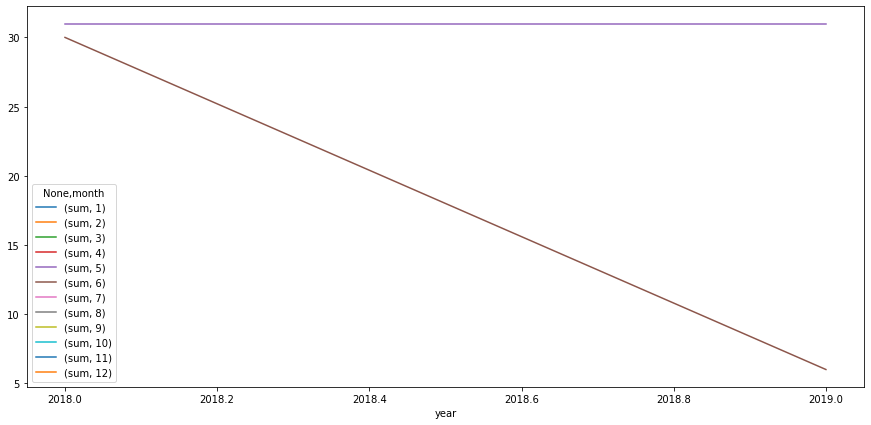

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
grouped_multiple.groupby(['year','month']).count()['fareAmount'].unstack().plot(ax=ax)

In [43]:
grouped_multiple.dtypes

year                 int64
month                int64
day                  int64
fareAmount  sum    float64
dtype: object

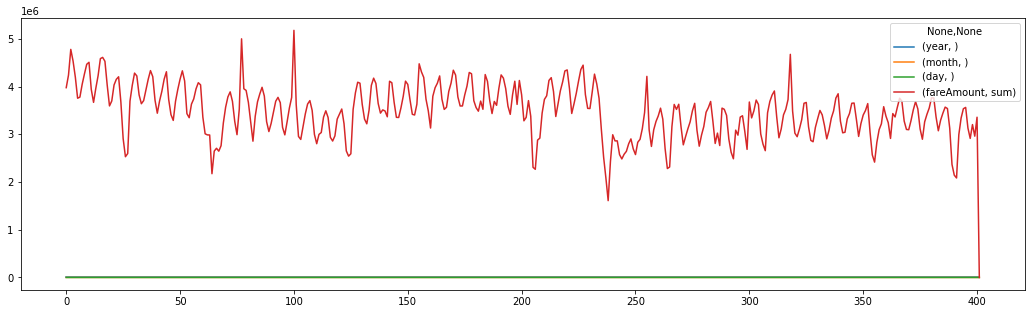

In [44]:
grouped_multiple.plot(figsize=(18,5))

In [45]:
grouped_multiple.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59e7d0e4e0>,
      dtype=object)

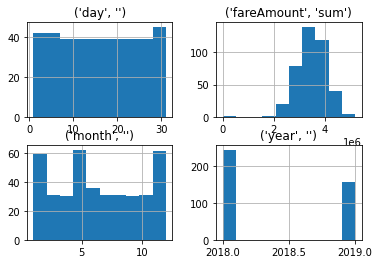

In [46]:
grouped_multiple.hist()

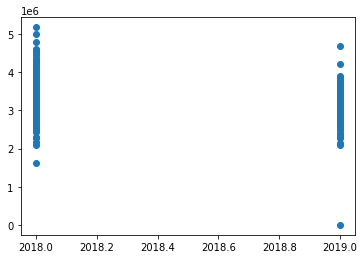

In [49]:
plt.scatter(grouped_multiple['year'], grouped_multiple['fareAmount'])

In [68]:
feature_cols = ['year', 'month', 'day']

X = pd.DataFrame(grouped_multiple['year'])
#X = grouped_multiple.iloc[:, 1:].values
#X = grouped_multiple.loc[:, feature_cols]
y = pd.DataFrame(grouped_multiple['fareAmount'])
model = LinearRegression()
scores = []

# split the records into 3 folds and train 3 times the model, 
# test and get the score of each training
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
  model.fit(X.iloc[train,:], y.iloc[train,:])
  score = model.score(X.iloc[test,:], y.iloc[test,:])
  scores.append(score)
print(scores)

[0.20924093781530917, 0.08134660777451164, 0.12944428637151084]


In [69]:
X['tod'] = grouped_multiple['year']
#X['tod'] = grouped_multiple.loc[:, feature_cols]
# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X['tod'], prefix='tod', drop_first=True)
# Add all the columns to the model data
X = X.join(add_var)
# Drop the original column that was expanded
X.drop(columns=['tod'], inplace=True)
print(X.head())

   year  tod_2019
0  2018         0
1  2018         0
2  2018         0
3  2018         0
4  2018         0


In [59]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))
print(scores)

[0.20552118591834667, 0.1013016681118667, 0.12895133561171312]


In [70]:
feature_cols = ['year', 'month', 'day']

#X = pd.DataFrame(grouped_multiple['year'])
#X = grouped_multiple.iloc[:, 1:].values
X = grouped_multiple.loc[:, feature_cols]
y = pd.DataFrame(grouped_multiple['fareAmount'])
model = LinearRegression()
scores = []

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
print(regressor.intercept_)

[1.02406904e+09]


In [75]:
print(regressor.coef_)

[[-505532.35873941  -21205.51426067   -7450.02208393]]


In [76]:
X_new = grouped_multiple.loc[:, feature_cols]

In [77]:
y_pred = regressor.predict(X_test)

In [81]:
y_pred

array([[3552279.03931141],
       [3257074.56105042],
       [3561456.32352376],
       [3622201.05218625],
       [3719051.33927739],
       [3215246.24266636],
       [3559729.06139541],
       [3523623.50296688],
       [3564889.97949708],
       [3200346.19849849],
       [3725356.80937016],
       [3181429.78822005],
       [3531073.52505076],
       [3617040.13408458],
       [3701862.19112718],
       [3164240.64006996],
       [3104640.46339858],
       [3572340.00158107],
       [3521334.39898455],
       [3536234.44315243],
       [3637101.09635413],
       [3264524.58313441],
       [3579790.02366495],
       [3224985.36873245],
       [3513884.37690067],
       [3267396.39725387],
       [3677784.86274707],
       [3679512.12487543],
       [3620473.7900579 ],
       [3652001.140522  ],
       [3653145.69251311],
       [3560873.61338651],
       [3624490.15616858],
       [3299485.58957171],
       [3668045.73668098],
       [3246190.88299322],
       [3486373.39254725],
 

In [91]:
y_pred = regressor.intercept_ + np.sum(regressor.coef_ * X, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
0      3.791262e+06
1      3.783812e+06
2      3.776362e+06
3      3.768912e+06
4      3.761462e+06
           ...     
397    3.257075e+06
398    3.249625e+06
399    3.242175e+06
400    3.234724e+06
401    3.227274e+06
Length: 402, dtype: float64


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [84]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 426042.97779434535
Mean Squared Error: 371506018123.1747
Root Mean Squared Error: 609512.9351565681


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [79]:
y_test

,sum
199,4127439.05
397,2913885.69
59,4035778.47
78,3954180.58
65,2647727.85
...,...
20,3698826.39
113,3360040.42
14,4229608.69
271,2779111.15


In [8]:
!pip install pyodbc
#https://docs.microsoft.com/en-us/sql/connect/odbc/linux-mac/installing-the-microsoft-odbc-driver-for-sql-server?view=sql-server-ver15#ubuntu17

sudo: pip: command not found


In [8]:
import pyodbc
server = 'servername.database.windows.net'
database = 'dbname'
username = 'username'
password = 'password'   
driver= '{ODBC Driver 17 for SQL Server}'

with pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
    with conn.cursor() as cursor:
        cursor.execute("select * from tablename")
        row = cursor.fetchone()
        while row:
            print (str(row[0]) + " " + str(row[1]))
            row = cursor.fetchone()

1 Server=tcp:bbaccdbsvr.database.windows.net,1433;Database=bbaccdb;User ID=sqladmin;Password=Azure!2345678;Trusted_Connection=False;Encrypt=True;Connection Timeout=30
2 Server=tcp:bbaccdbsvr.database.windows.net,1433;Database=bbaccdb1;User ID=sqladmin;Password=Azure!2345678;Trusted_Connection=False;Encrypt=True;Connection Timeout=30
3 Server=tcp:bbaccdbsvr.database.windows.net,1433;Database=bbaccdb2;User ID=sqladmin;Password=Azure!2345678;Trusted_Connection=False;Encrypt=True;Connection Timeout=30
4 Server=tcp:bbaccdbsvr.database.windows.net,1433;Database=bbaccdb3;User ID=sqladmin;Password=Azure!2345678;Trusted_Connection=False;Encrypt=True;Connection Timeout=30
